In [1]:
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [30]:
def calibrate_camera():
    nx = 9
    ny = 6
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    # Get image shape
    img_shape = plt.imread('camera_cal/calibration1.jpg').shape[0:2]
    img_shape = {'x': img_shape[1], 'y': img_shape[0]}
    
    # Make a list of calibration images
    images = glob.glob('camera_cal/calibration*.jpg')
    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
            write_name = 'camera_cal/corners_found/corners_found'+str(idx)+'.jpg'
            cv2.imwrite(write_name, img)
    
            
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (img_shape['x'], img_shape['y']), None, None)
    return ret, mtx, dist, rvecs, tvecs

In [31]:
ret, mtx, dist, rvecs, tvecs = calibrate_camera()

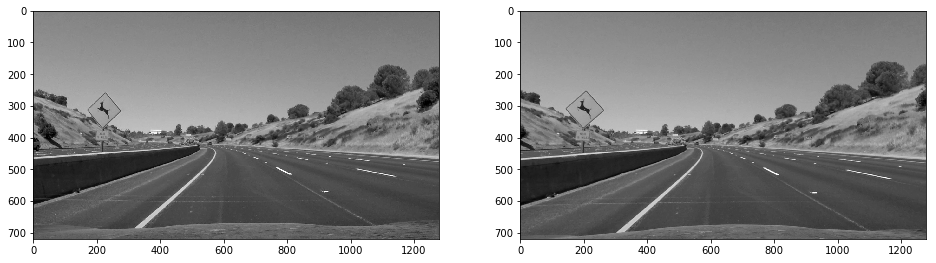

In [35]:
test_image = plt.imread('test_images/test2.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
undistorted = cv2.undistort(test_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,9))
ax1.imshow(test_image, cmap = 'gray')
ax2.imshow(undistorted, cmap = 'gray')

In [29]:
rvecs

[array([[-0.02434082],
        [-0.48814782],
        [ 0.0205404 ]]), array([[ 0.05531879],
        [-0.51892709],
        [-0.00398629]]), array([[ 0.01805199],
        [ 0.02669678],
        [-0.00551439]]), array([[ 0.0178336 ],
        [ 0.63674357],
        [ 0.00826376]]), array([[ 0.03471112],
        [ 0.65086688],
        [ 0.00971071]]), array([[ 0.21226762],
        [-0.067192  ],
        [ 0.0124846 ]]), array([[-0.19458111],
        [-0.76190721],
        [ 0.12161603]]), array([[ 0.03492402],
        [ 0.45739729],
        [ 0.00492867]]), array([[-0.02563264],
        [ 0.38170173],
        [-0.00443487]]), array([[ 0.08447458],
        [ 0.38039934],
        [ 0.05427302]]), array([[ 0.04125139],
        [-0.46371786],
        [-0.05619974]]), array([[ 0.63236599],
        [-0.04827079],
        [ 0.01721011]]), array([[ 0.02790357],
        [-0.70679126],
        [-0.01797426]]), array([[-0.33084415],
        [ 0.65914967],
        [-0.41537657]]), array([[ 0.17850283